In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

# [참고문서](https://youtu.be/4jv1NGlAc_0)

# Data

In [2]:
import FinanceDataReader as fdr 
fdr.__version__

'0.9.50'

In [3]:
stock_code = '005930' # 삼성전자

df1 = fdr.DataReader(stock_code, '2010')
df1['stock_code'] = stock_code
df1.reset_index(inplace=True)

print(df1.shape)
df1.head()

(3358, 8)


,Date,Open,High,Low,Close,Volume,Change,stock_code
0,2010-01-04,16060,16180,16000,16180,239271,0.012516,005930
1,2010-01-05,16520,16580,16300,16440,559219,0.016069,005930
2,2010-01-06,16580,16820,16520,16820,459755,0.023114,005930
3,2010-01-07,16820,16820,16260,16260,443237,-0.033294,005930
4,2010-01-08,16400,16420,16120,16420,295798,0.009840,005930


# Preprocessing Data

In [38]:
mydata = df1[['Open', 'Volume', 'Close']]
mydata.index = df1['Date']
mydata = mydata[mydata['Open'] > 0]

print(mydata.shape)
mydata.head()

(3355, 3)


,Open,Volume,Close
Date,,,
2010-01-04,16060,239271,16180
2010-01-05,16520,559219,16440
2010-01-06,16580,459755,16820
2010-01-07,16820,443237,16260
2010-01-08,16400,295798,16420


In [39]:
mydata.describe()

,Open,Volume,Close
count,3355.000000,3.355000e+03,3355.000000
mean,40267.903130,6.223916e+06,40251.687034
std,19397.209493,8.981618e+06,19373.732746
min,13680.000000,6.598500e+04,13600.000000
25%,25300.000000,2.329870e+05,25280.000000
50%,32040.000000,3.788200e+05,32280.000000
75%,54300.000000,1.195691e+07,54200.000000
max,90300.000000,9.030618e+07,91000.000000


<Axes: xlabel='Date'>

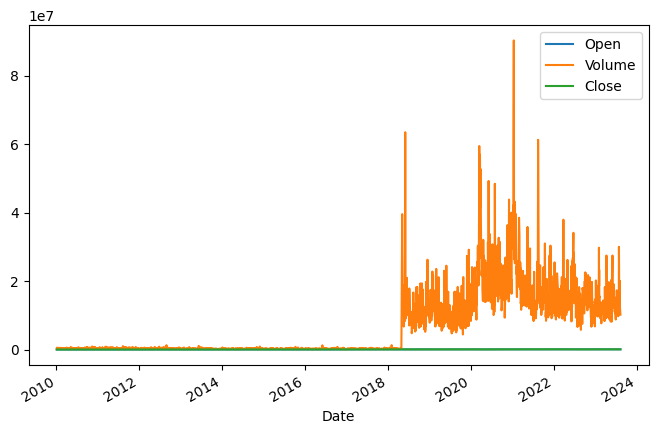

In [40]:
mydata.plot(figsize=(8,5))

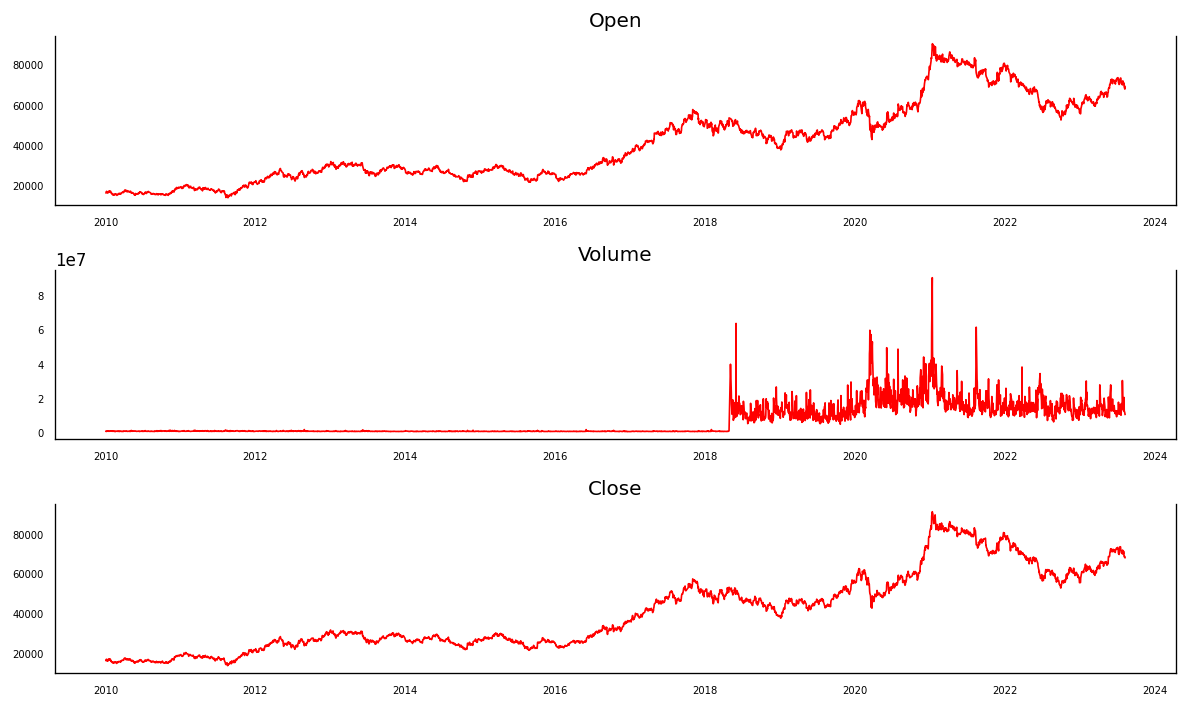

In [42]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    _data = mydata[mydata.columns[i]]
    ax.plot(_data, color='red', linewidth=1)

    # Decorations 
    ax.set_title(mydata.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

## Stationary (정상성)

In [43]:
adfuller_Open = adfuller(mydata['Open'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_Open[0]))
print("p-value: {}".format(adfuller_Open[1]))

ADF test statistic: -0.8658052656339681
p-value: 0.7990246184462441


In [44]:
adfuller_Volume = adfuller(mydata['Volume'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_Volume[0]))
print("p-value: {}".format(adfuller_Volume[1]))

ADF test statistic: -2.3888948068358675
p-value: 0.14489533041916758


In [45]:
adfuller_Close = adfuller(mydata['Close'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_Close[0]))
print("p-value: {}".format(adfuller_Close[1]))

ADF test statistic: -0.8891841673703906
p-value: 0.7915133562721225


### Differencing (차분)

In [46]:
adfuller_Open = adfuller(mydata['Open'].diff()[1:], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_Open[0]))
print("p-value: {}".format(adfuller_Open[1]))

ADF test statistic: -13.929865278028462
p-value: 5.1128065274486776e-26


In [47]:
adfuller_Volume = adfuller(mydata['Volume'].diff()[1:], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_Volume[0]))
print("p-value: {}".format(adfuller_Volume[1]))

ADF test statistic: -15.641742983995849
p-value: 1.6370421826676878e-28


In [48]:
adfuller_Close = adfuller(mydata['Close'].diff()[1:], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_Close[0]))
print("p-value: {}".format(adfuller_Close[1]))

ADF test statistic: -41.988044448547925
p-value: 0.0


In [ ]:
grangercausalitytests()